# Code deals with the process of cutting down the TRILEGAL sample to match the G Dwarfs in Shibayama 2013

This script opens the TRILEGAL sample and cuts it down by the same temperature and logg used in the Shibayama 2013 sample, in order to match their sample cut of G dwarfs.

### Cutting down the TRILEGAL/Kepler sample to match the Shibayama sample of G dwarfs.

In [1]:
# Necessary modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import csv

# Checking the current sample
data = pd.read_csv('/Users/Jess/SF_m_dwarfs/sf_trilegal_data/final_trilegal_master.csv')
teff = data['logTe']
teff_down = 10**teff
logg = data['logg']
kep_mag = data['Kepler']
print('Number of stars in the final TRILEGAL/Mathur sample: ' + str(len(kep_mag)))

# Cutting sample down to G stars
g_stars = data[(data['logTe'] >= np.log10(5100)) & (data['logTe'] < np.log10(6000)) & (data['logg'] >= 4)]   
print('Number of G stars in the final TRILEGAL/Mathur sample: ' + str(len(g_stars['logTe'])))
print('Number of stars in the Mathur sample: 80000')
np.savetxt('/Users/Jess/SF_m_dwarfs/SF_data_files/g_stars.csv', g_stars, delimiter=',', header='index,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,Ks,Mact')

Number of stars in the final TRILEGAL/Mathur sample: 194416
Number of G stars in the final TRILEGAL/Mathur sample: 73608
Number of stars in the Mathur sample: 80000


### Comparing the Shibayama sample of G stars to the sample created to replicate it.

In [2]:
# Loading necessary data
g_stars = pd.read_csv('/Users/Jess/SF_m_dwarfs/SF_data_files/g_stars.csv') 
teff_g = g_stars['logTe']
logg_g = g_stars['logg']
kepler_g = g_stars['Kepler']

In [4]:
# Loading shib and mathur data for comparison
shib = pd.read_csv('/Users/Jess/SF_m_dwarfs/SF_other_works/shib_sample_edited.csv', delimiter='|')
shib_teff = np.log10(shib['Teff'])
shib_logg = shib['log(g)']
shib_kepler = shib['Kpmag']

mathur = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_mathur_magnitudes/complete_mathur_file.csv', delimiter=',')
mathur_g_stars = mathur[(mathur['teff'] >= 5100) & (mathur['teff'] < 6000) & (mathur['logg'] >= 4)]   
mathur_teff = mathur_g_stars['teff']
mathur_logg = mathur_g_stars['logg']
mathur_kepler = mathur_g_stars['kep_mag']

/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


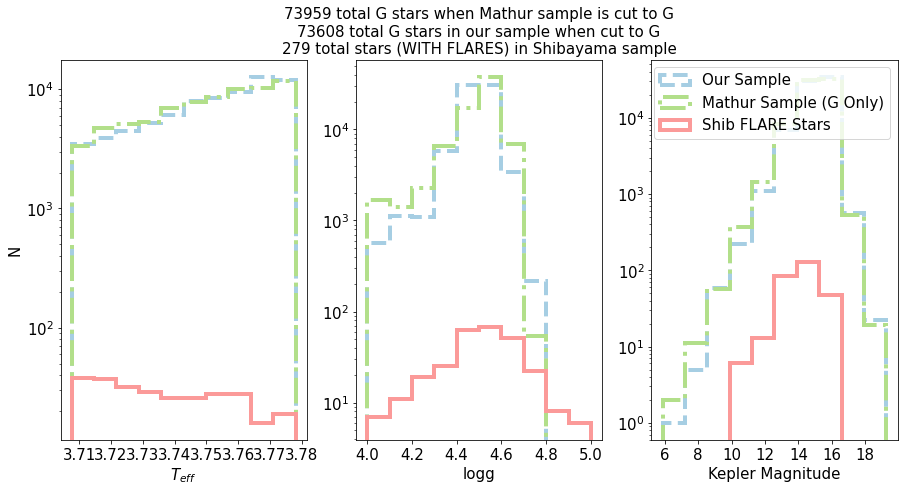

In [5]:
# Plotting comparison between our full sample cut to Mathur, the original Mathur sample
# And the sample from S13 ON WHICH FLARES WERE FOUND.
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.hist(teff_g, range=(min(shib_teff), max(shib_teff)), edgecolor='#a6cee3', histtype='step', linewidth=4, linestyle='--')
plt.hist(np.log10(mathur_teff), range=(min(shib_teff), max(shib_teff)), edgecolor='#b2df8a', histtype='step', linewidth=4, linestyle='-.')
plt.hist(shib_teff, edgecolor='#fb9a99', histtype='step', linewidth=4)
plt.ylabel('N', fontsize=15)
plt.xlabel(r'$T_{eff}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.subplot(132)
plt.hist(logg_g, range=(min(shib_logg), max(shib_logg)), edgecolor='#a6cee3', histtype='step', linewidth=4, linestyle='--')
plt.hist(mathur_logg, range=(min(shib_logg), max(shib_logg)), edgecolor='#b2df8a', histtype='step', linewidth=4, linestyle='-.')
plt.hist(shib_logg, edgecolor='#fb9a99', histtype='step', linewidth=4)
plt.title(str(len(mathur_g_stars)) + ' total G stars when Mathur sample is cut to G\n' + str(len(kepler_g)) + ' total G stars in our sample when cut to G\n' + str(len(shib_kepler)) + ' total stars (WITH FLARES) in Shibayama sample', fontsize=15)
plt.xlabel('logg', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.subplot(133)
plt.hist(kepler_g, range=(min(mathur_kepler), max(mathur_kepler)), color='#a6cee3', histtype='step', linewidth=4, label='Our Sample', linestyle='--')
plt.hist(mathur_kepler, color='#b2df8a', histtype='step', linewidth=4, label='Mathur Sample (G Only)', linestyle='-.')
plt.hist(shib_kepler, range=(min(mathur_kepler), max(mathur_kepler)), color='#fb9a99', histtype='step', linewidth=4, label='Shib FLARE Stars')
plt.xticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.xlabel('Kepler Magnitude', fontsize=15)
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_plots/P_histogram_shibayama_comparisons.png')
plt.show()

### Checking that the Shibayama G dwarfs all fall uniformly in the Kepler FOV.

In [8]:
# Pull RA and Dec values for Kepler
ra = pd.read_csv('/Users/jess/SF_m_dwarfs/SF_other_works/Supplement_20090714_00/morc_2_ra_dec_4_seasons.csv')['ra_sp']
dec = pd.read_csv('/Users/jess/SF_m_dwarfs/SF_other_works/Supplement_20090714_00/morc_2_ra_dec_4_seasons.csv')['dec_sp']

In [9]:
# Pull RA and Dec values for the S13 stars
ra_shib = pd.read_csv('/Users/Jess/SF_m_dwarfs/SF_other_works/shib_sample_edited.csv', delimiter='|')['_RA']
dec_shib = pd.read_csv('/Users/Jess/SF_m_dwarfs/SF_other_works/shib_sample_edited.csv', delimiter='|')['_DE']

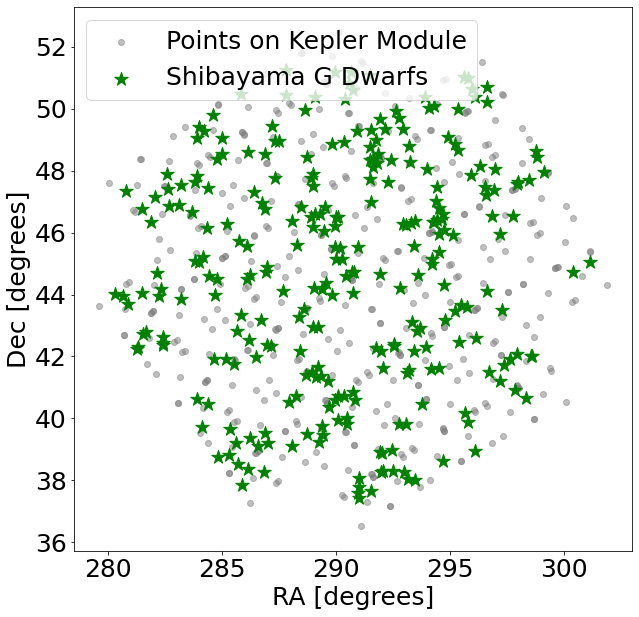

In [10]:
# Plot these stars on the Kepler FOV
plt.figure(figsize=(10, 10))
plt.scatter(ra, dec, color='grey', alpha=0.5, label='Points on Kepler Module')
plt.scatter(ra_shib, dec_shib, marker='*', s=200, color='Green', label='Shibayama G Dwarfs')
plt.ylabel('Dec [degrees]', fontsize=25)
plt.xlabel('RA [degrees]', fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig('/Users/jess/SF_m_dwarfs/SF_plots/P_shib_stars_on_fov.png')
plt.show()